Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ modeling_dataset.csv created at: /content/drive/MyDrive/Weather Data Projects/Weather_NatGas/data/processed/modeling_dataset.csv
       month  HDD  gas_demand  month_num month_str  HDD_lag1  gas_demand_lag1  \
0 2023-03-01  589        3107          3       Mar     589.0           3119.0   
1 2023-04-01  219        1538          4       Apr     589.0           3107.0   
2 2023-05-01  132        1329          5       May     219.0           1538.0   
3 2023-06-01   10        1163          6       Jun     132.0           1329.0   
4 2023-07-01    0         964          7       Jul      10.0           1163.0   

   HDD_diff  HDD_rolling3  
0       0.0    622.333333  
1    -370.0    465.666667  
2     -87.0    313.333333  
3    -122.0    120.333333  
4     -10.0     47.333333  


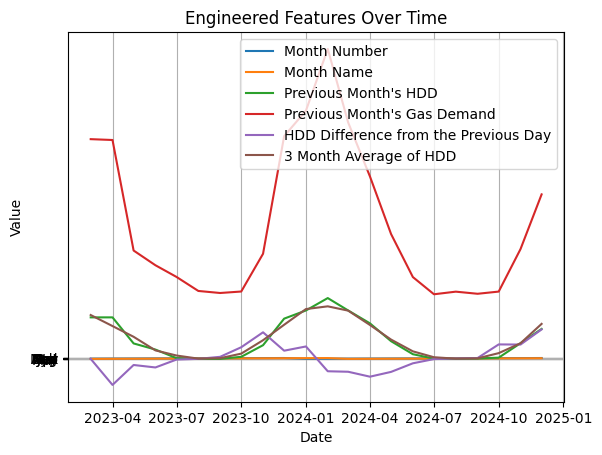

✅ Final dataset saved.


In [2]:
# 📦 Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from google.colab import drive
drive.mount('/content/drive')


# Add the src directory to Python path
sys.path.append(os.path.abspath('/content/drive/MyDrive/Weather Data Projects/Weather_NatGas/src'))

from data_processing import process_noaa, process_eia
from preprocess import create_features

# File paths
noaa_path = "/content/drive/MyDrive/Weather Data Projects/Weather_NatGas/data/raw/NOAA_Data.csv"
eia_path = "/content/drive/MyDrive/Weather Data Projects/Weather_NatGas/data/raw/EIA_Gas_Data.csv"
output_path = "/content/drive/MyDrive/Weather Data Projects/Weather_NatGas/data/processed/modeling_dataset.csv"

# Run processing functions
noaa_df = process_noaa(noaa_path)
eia_df = process_eia(eia_path)

# Merge and save
modeling_df = noaa_df.merge(eia_df, on="month", how="inner").sort_values("month")
modeling_df = modeling_df[["month", "HDD", "gas_demand"]]
os.makedirs(os.path.dirname(output_path), exist_ok=True)
modeling_df.to_csv(output_path, index=False)

print(f"✅ modeling_dataset.csv created at: {output_path}")
modeling_df.head()

# 🛠️ Feature engineering
df_features = create_features(modeling_df)

# 🧪 Preview engineered data
print(df_features.head())


# 📊 Visualize engineered features
plt.plot(df_features["month"], df_features["month_num"], label="Month Number")
plt.plot(df_features["month"], df_features["month_str"], label="Month Name")
plt.plot(df_features["month"], df_features["HDD_lag1"], label="Previous Month's HDD")
plt.plot(df_features["month"], df_features["gas_demand_lag1"], label="Previous Month's Gas Demand")
plt.plot(df_features["month"], df_features["HDD_diff"], label="HDD Difference from the Previous Day")
plt.plot(df_features["month"], df_features["HDD_rolling3"], label="3 Month Average of HDD")
plt.title("Engineered Features Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


# 💾 Optional: Save final dataset
df_features.to_csv("/content/drive/MyDrive/Weather Data Projects/Weather_NatGas/data/processed/modeling_features_dataset.csv", index=False)
print("✅ Final dataset saved.")



In [3]:
modeling_df.head()

,month,HDD,gas_demand
0,2023-01-01,689,3758
1,2023-02-01,589,3119
2,2023-03-01,589,3107
3,2023-04-01,219,1538
4,2023-05-01,132,1329


In [4]:
print(df_features.head())

       month  HDD  gas_demand  month_num month_str  HDD_lag1  gas_demand_lag1  \
0 2023-03-01  589        3107          3       Mar     589.0           3119.0   
1 2023-04-01  219        1538          4       Apr     589.0           3107.0   
2 2023-05-01  132        1329          5       May     219.0           1538.0   
3 2023-06-01   10        1163          6       Jun     132.0           1329.0   
4 2023-07-01    0         964          7       Jul      10.0           1163.0   

   HDD_diff  HDD_rolling3  
0       0.0    622.333333  
1    -370.0    465.666667  
2     -87.0    313.333333  
3    -122.0    120.333333  
4     -10.0     47.333333  
